<a href="https://colab.research.google.com/github/CeSaRLoPeZArTeAgA/Maestria-IMCA/blob/main/Regresion_Lineales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAESTRIA DE MODELIZACION MATEMATICA Y COMPUTACIONAL
---
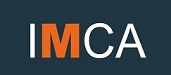


---


# CLASE: REGRESION LINEAL SIMPLE Y REGRESION LINEAL MULTIPLE

# **1.- REGRESION LINEAL SIMPLE**

In [29]:
#importacion de librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**LECTURA DE LA DATA**

Para este ejemplo usaremos las ventas anuales de cafeterias en Canadá con el fin de predecir las ventas de cada una en función de sus características.

In [30]:
#lectura de archivo VentasCaf.csv desde
df_ventas = pd.read_csv('VentasCaf.csv')
#se muestra los primeros 5 elementos de la data
df_ventas.head()

,Unnamed: 0,area,publicidad_exterior,num_productos,delivery,ventas
0,0,52.324250,0,28.717111,1,83188
1,1,53.972180,0,24.061171,1,68638
2,2,53.231438,0,16.724146,1,84210
3,3,43.583231,0,29.307826,1,82888
4,4,36.769380,0,18.313163,0,57796


In [31]:
#se elimina la primera columna, la cual no aporta informacion
df_ventas = df_ventas.drop("Unnamed: 0",axis=1)
df_ventas = df_ventas.drop("publicidad_exterior",axis=1)
df_ventas = df_ventas.drop("delivery",axis=1)

#se muestra los primeros 5 elementos de la data
df_ventas.head()

,area,num_productos,ventas
0,52.324250,28.717111,83188
1,53.972180,24.061171,68638
2,53.231438,16.724146,84210
3,43.583231,29.307826,82888
4,36.769380,18.313163,57796


In [32]:
#vemos las dimensiones de la base de datos
df_ventas.shape

(1116, 3)

In [33]:
#vemos la informacion basica de la data, cuanto datos no nulos
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area           1116 non-null   float64
 1   num_productos  1116 non-null   float64
 2   ventas         1116 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 26.3 KB


**DIVISION DE LA DATA EN TRAIN Y TEST**

La función train_test_split nos permite dividir la data de forma aleatoria en conjuntos de entrenamiento(train) y prueba(test) para poder entrenar nuestro modelo

In [34]:
#se carga la libreria para la division de la data del sklean
from sklearn.model_selection import train_test_split
#se devide la data en df_train y df_test, con un 20% de la data en df_test y una semilla de aleatoriedad 2023
df_train, df_test = train_test_split(df_ventas, test_size = 0.20, random_state = 2023)

In [35]:
#vemos las dimensiones de la data train
df_train.shape

(892, 3)

In [36]:
#se muestra los primeros 10 elementos de la data
df_train.head(10)

,area,num_productos,ventas
468,44.834952,24.175217,70642
777,38.716953,14.395952,68040
738,49.939670,15.740714,79080
1025,41.475491,20.752021,69649
294,45.264330,28.954984,77936
891,45.906836,13.513593,49620
880,52.783184,32.421376,85235
314,51.423132,26.468755,73204
437,34.162867,20.832900,68069
190,48.210438,21.161101,72921


In [37]:
#vemos las dimensiones de la data test
df_test.shape

(224, 3)

In [38]:
#De la data df_train, se borrara la columna ventas el cual sera la variable
#objetivo de la regresion lineal.Este nueva data lo guardaremos con las
#variables dependientes X_train
X_train = df_train.drop('ventas', axis = 1)

#De la data df_train, solo se consultara la variable objetivo, el cual se
#guardara como variable independiente y_train
y_train = df_train['ventas']

#De la data df_test, se borrara la columna ventas el cual sera la variable
#objetivo de la regresion lineal.Este nueva data lo guardaremos con las
#variables dependientes X_test
X_test = df_test.drop('ventas', axis = 1)

#De la data df_test, solo se consultara la variable objetivo, el cual se
#guardara como variable independiente y_test
y_test = df_test['ventas']

**ANALISIS DE LA DATA, PARA LA REGRESION LINEAL**

Elegimos una variable que tenga una relación aparentemente lineal con el target. Hacemos las graficas de cada variable dependiente con la variable independiente objetivo y_train. Lo graficaremos con diagra de dispersion

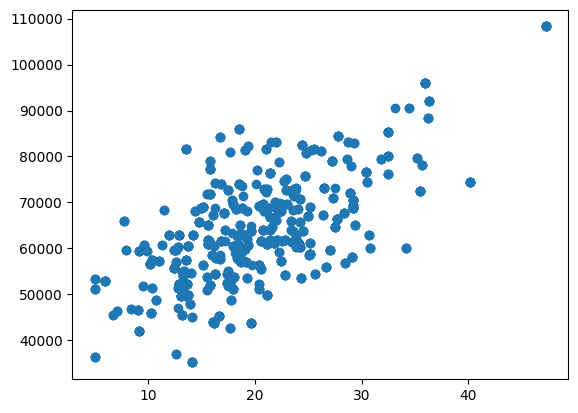

In [39]:
#Diagrama de dispersion entre x=num_productos y y=ventas
plt.scatter(X_train['num_productos'], y_train)
plt.show()

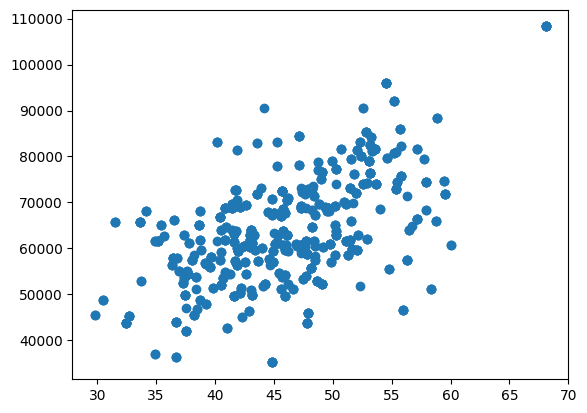

In [40]:
#Diagrama de dispersion entre x=are y y=ventas
plt.scatter(X_train['area'], y_train)
plt.show()

OBSERVACION: De los graficos de dispersion se usara la variable x=num_productos y y=ventas

**MODELO DE REGRESION LINEAL**

Ahora queremos validar si podemos crear un modelo que permita predecir las ventas de cada cafetería a partir de sus caracteristicas. Para el modelo lineal simple tenemos:

$$
ventas = \beta_0 + \beta_1    *  num\_productos
$$

In [42]:
#cargamos la libreria para cargar el modelo de regresion lineal
from sklearn.linear_model import LinearRegression

#definimos el objeto del modelo lineal a usar lr
lr = LinearRegression()

#ajuste de la recta de regresión (entrenamiento del modelo X_train y y_train)
lr.fit(X_train[['num_productos']], y_train)

LinearRegression()

**Calculo del coeficiente $\beta_1 =$ lr.coef_**

In [43]:
lr.coef_

array([1047.20207079])

**Calculo del coeficiente $\beta_0 =$ lr.intercept_**

In [44]:
lr.intercept_

42892.554585839025

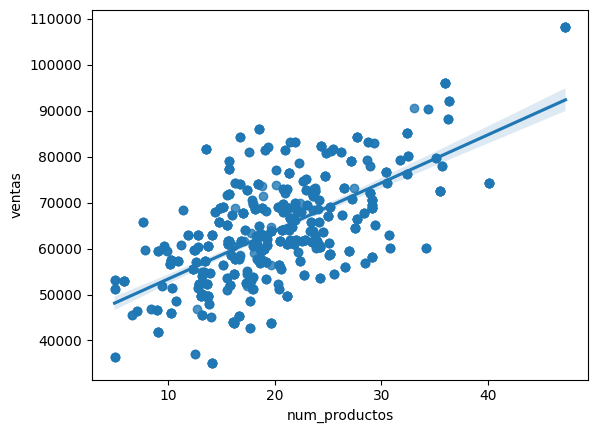

In [45]:
#se plotea la grafica la dispersion con la recta de ajuste lineal
#esto lo hace internamente el sns, no usa la regresion previamente
#ajustada.
sns.regplot(x=X_train['num_productos'], y=y_train)
plt.show()

**CALCULO DE ERROR**

Evaluación de la regresión lineal los rendimiento de lo predicho contra la data de testeo, para ello usaremos las metricas MSE, RMSE y Coeficiente Regresion.


---



**MSE (mean_squared_error) y RMSE(Root Mean Squared Error)**

El error cuadrático medio es una métrica comúnmente utilizada para evaluar el rendimiento de modelos de regresión en machine learning. La fórmula general es:

$$
MSE=\frac{1}{n}\sum\limits _{i=1}^{n}( y_{i} -\hat{y}_{i})^{2}
$$
Donde:

* $n$ es el número de observaciones (datos).
* $y_{i}$ es el valor real u observado para la i-ésima observación.
* $\hat{y}_{i}$ es el valor predicho por el modelo para la i-ésima observación.

$$ $$
El Error Cuadrático Medio de la Raíz, o RMSE por sus siglas en inglés (Root Mean Squared Error), es otra métrica comúnmente utilizada en problemas de regresión para evaluar la precisión de un modelo en sus predicciones. El RMSE es una medida de la dispersión de las diferencias entre los valores reales y los valores predichos por el modelo. La fórmula para el RMSE es la siguiente:
$$
RMSE=\sqrt{MSE}
$$


---

**COEFICIENTE DE DETERMINACION (r2_score)**

El coeficiente de determinación, comúnmente conocido como $R^{2}$ o coeficiente $R^{2}$, es otra métrica utilizada para evaluar el rendimiento de un modelo de regresión. Representa la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes en el modelo.

El $R^{2}$ varía entre 0 y 1. Un $R^{2}$ de 1 indica que el modelo explica perfectamente la variabilidad de la variable dependiente, mientras que un
$R^{2}$ de 0 indica que el modelo no explica nada de esa variabilidad. En términos sencillos, $R^{2}$ proporciona una medida de qué tan bien las predicciones del modelo se ajustan a los datos reales. La fórmula para el $R^{2}$ es la siguiente:

$$
 \begin{array}{l}
R^{2} =1-\frac{\sum\limits _{i=1}^{n}( y_{i} -\hat{y}_{i})^{2}}{\sum\limits _{i=1}^{n}( y_{i} -\overline{y})^{2}}\\
\end{array}
$$

Donde:

* $n$ es el número de observaciones.
* $y_{i}$ es el valor real de la i-ésima observación.
* $\hat{y}_{i}$  es el valor predicho por el modelo para la i-ésima observación.
* $\overline{y}$ es la media de los valores reales

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
#obtenemos las predicciones del modelo para poder evaluarlas los errores
y_train_pred = lr.predict(X_train[['num_productos']])
y_test_pred = lr.predict(X_test[['num_productos']])

print('MSE train:', mean_squared_error(y_train, y_train_pred))
print('MSE test:', mean_squared_error(y_test, y_test_pred))

print('RMSE train:', mean_squared_error(y_train, y_train_pred) ** 0.5)
print('RMSE test:', mean_squared_error(y_test, y_test_pred) ** 0.5)

print('R2 train:', r2_score(y_train, y_train_pred))
print('R2 test:', r2_score(y_test, y_test_pred))

MSE train: 79867463.27846073
MSE test: 80853598.78438337
RMSE train: 8936.859810831807
RMSE test: 8991.862920684644
R2 train: 0.40321210470894786
R2 test: 0.33908779548515366


# **2.- REGRESION LINEAL MULTIPLE**

---


**MODELO DE REGRESION LINEAL MULTIPLE**

Utilizamos todas las variables para la predicción:

$$
ventas = \beta_0 + \beta_1 * area + \beta_3    *  num\_productos
$$

In [48]:
#cargamos la libreria para cargar el modelo de regresion lineal
from sklearn.linear_model import LinearRegression

#definimos el objeto del modelo lineal a usar lr_multiple
lr_multiple = LinearRegression()

#ajuste del modelo de regresión (entrenamiento del modelo X_train y y_train)
lr_multiple.fit(X_train, y_train)

LinearRegression()

**CALCULO DE ERROR**

Evaluación de la regresión lineal multiploe los rendimiento de lo predicho contra la data de testeo, para ello usaremos las metricas MSE, RMSE y Coeficiente Regresion.

---

In [49]:
#obtenemos las predicciones del modelo para poder evaluarlas los errores
y_test_pred = lr_multiple.predict(X_test)
y_train_pred = lr_multiple.predict(X_train)

print('MSE train:', mean_squared_error(y_train, y_train_pred))
print('MSE test:', mean_squared_error(y_test, y_test_pred))

print('RMSE train:', mean_squared_error(y_train, y_train_pred) ** 0.5)
print('RMSE test:', mean_squared_error(y_test, y_test_pred) ** 0.5)

print('R2 train:', r2_score(y_train, y_train_pred))
print('R2 test:', r2_score(y_test, y_test_pred))

MSE train: 59919533.10395228
MSE test: 64275804.91708984
RMSE train: 7740.770833964295
RMSE test: 8017.219275851811
R2 train: 0.5522675870741716
R2 test: 0.47459773512363357


In [50]:
lr_multiple.coef_

array([722.59869369, 837.06894869])

In [51]:
lr_multiple.intercept_

13920.438610116442

In [52]:
betas = pd.DataFrame({'features': X_train.columns, 'beta': lr_multiple.coef_})
betas

,features,beta
0,area,722.598694
1,num_productos,837.068949
